# **Process Nighttime Satellite Imagery**

## Source of nighttime satellite imagery

  - NOAA National Center for Environmental Information (NCEI): https://ngdc.noaa.gov/eog/viirs/download_dnb_composites.html

  - Earth Observation Group (EOG),  Colorado School of Mines: https://eogdata.mines.edu/products/vnl/

  - Earth Engine Data Catalog: https://developers.google.com/earth-engine/datasets/catalog/NOAA_VIIRS_DNB_ANNUAL_V21/


## Specifications
- Sensor: Visible Infrared Imaging Radiometer Suite (VIIRS)

-  Time Step: Annual composites (2016)

- Radiance Unit: nW/cm^2/sr

- Image CRS:	EPSG:4326 (Geographic Latitude/Longitude)

- Image Resolution:	15 arc second (~500m at the Equator)

- Tile: Tile5(60W00N)

### Mount Google Drive

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Add absolute path to the project folder

In [21]:
import sys

sys.path.append("/content/drive/MyDrive/UNECA_MachineLearning_Project/")

# See the full list of paths in sys.path
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/UNECA_MachineLearning_Project/',
 '/content/drive/MyDrive/UNECA_MachineLearning_Project/',
 '/content/drive/MyDrive/UNECA_MachineLearning_Project/']

## Add Base Directory

In [22]:
# Sets the base directory variable
BASE_DIR = '/content/drive/MyDrive/UNECA_MachineLearning_Project/'

In [23]:
import os
# Change the current working directory
os.chdir(BASE_DIR)

# Print the current working directory to verify the change
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/drive/MyDrive/UNECA_MachineLearning_Project


## Importing necessary python libraries and modules

In [24]:
# For interacting with the operating system, such as reading or writing files.
import os

# Importing the pandas library for manipulation DataFrame.
import pandas as pd

# Importing the numpy library for array and matrix manipulation.
import numpy as np

# Importing the geoio library to easily interact with geospatial data(Geotif)
import geoio

# Import IPython.display to display images
from IPython.display import Image

# Import rasterio to read and write geospatial raster data
import rasterio

# Importing the matplotlib.pyplot for data visualization.
import matplotlib.pyplot as plt

# Importing the seaborn library for enhanced data visualization.
import seaborn as sns

# Importing the plotly.express library for interactive plots.
import plotly.express as px

# Importing the plotly.graph_objects library for more control over plots.
import plotly.graph_objects as go

# Importing a custom utility function 'create_space' from the 'utils' module.
from utils import create_space

# Importing the warnings module to manage warning messages during code execution.
import warnings

# Filtering out DeprecationWarnings to avoid clutter in the output.
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Enabling inline plotting for matplotlib in Jupyter notebooks.
%matplotlib inline

In [25]:
# Finxing geoio package
# If you encounter the "ModuleNotFoundError: No module named 'geoio'" error when attempting to import 'geoio'
# follow these steps to manually install and address the issue:

# Install 'geoio' using the following pip command:
# pip install geoio

# Open the terminal and navigate to the 'geoio' directory:
# cd /usr/local/lib/python3.10/dist-packages/geoio

# Open the 'base.py' file for editing:
# vi base.py

# In the 'base.py' file, locate the line that includes the following import:
# from collections import Sequence

# Modify the line by adding ".abc" after "collections":
# from collections.abc import Sequence

# Save the changes and exit the editor.

## Define the folder data paths

In [26]:
# Creates the PROCESSED_DIR variable & join it to the BASE_DIR
PROCESSED_DIR = os.path.join(BASE_DIR, 'processed')

# Creates the NIGHTLIGHTS_DIR variable & join it to the BASE_DIR
NIGHTLIGHTS_DIR = os.path.join(BASE_DIR, 'nightlight', 'malawi_2016')

# Print the variables
print(PROCESSED_DIR)
print(NIGHTLIGHTS_DIR)

/content/drive/MyDrive/UNECA_MachineLearning_Project/processed
/content/drive/MyDrive/UNECA_MachineLearning_Project/nightlight/malawi_2016


## Create a lsit of GeoImage class

In [27]:
# Define the path of the file
NIGHTLIGHTS_DIRS_Malawi = [os.path.join(NIGHTLIGHTS_DIR, 'malawi_nightlight_2015_viirs.tif')]

# Creates a list called tifs
tifs = [geoio.GeoImage(ndir) for ndir in NIGHTLIGHTS_DIRS_Malawi]

## Get the metadata of the file

In [28]:
tifs

[Class Name        : GeoImage
 Driver Name       : GTiff
 Data Type         : Float32
 File Name         : /content/drive/MyDrive/UNECA_MachineLearning_Project/nightli
                     ght/malawi_2016/malawi_nightlight_2015_viirs.tif
 File List         : ['/content/drive/MyDrive/UNECA_MachineLearning_Project/night
                     light/malawi_2016/malawi_nightlight_2015_viirs.tif']
 Dimensions        : (1, 1582, 2367) (nlayers, nrows, ncols)
 Resolution        : (0.004166666700379266, 0.004166666700042248) (x,y)
 Extent            : (31.181250729, -8.481250068, 37.772917449, -18.343750147)
                     (ul_x, ul_y, lr_x, lr_y)
 Projection String : GEOGCS["WGS 84",
                      DATUM["WGS_1984",
                          SPHEROID["WGS 84",6378137,298.257223563,
                              AUTHORITY["EPSG","7030"]],
                          AUTHORITY["EPSG","6326"]],
                      PRIMEM["Greenwich",0],
                      UNIT["degree",0.0174532925

## Extracts the data array  from the tifs list

In [29]:
tif_array = np.squeeze(tifs[0].get_data())
tif_array.shape

(2367, 1582)

## Plot the nightlight satellite imagery

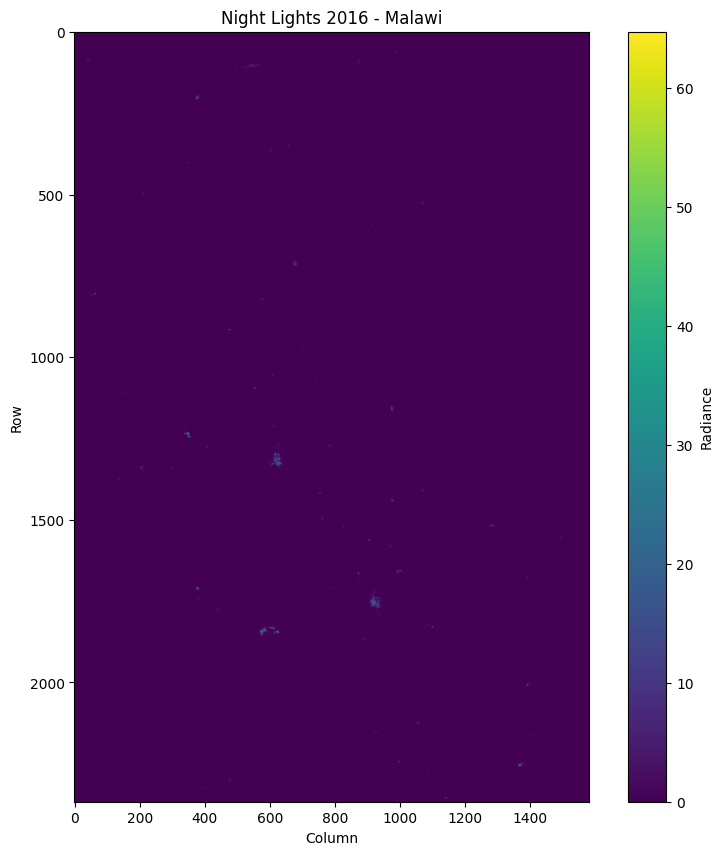

In [30]:
# Open the TIFF file
tif_file = 'nightlight/malawi_2016/malawi_nightlight_2015_viirs.tif'
with rasterio.open(tif_file) as src:
    # Read the raster data
    raster_data = src.read(1)

# Plot the raster data
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='viridis')
plt.colorbar(label='Radiance')
plt.title('Night Lights 2016 - Malawi')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

In [31]:
raster_data.min(), raster_data.max()

(-0.007724168, 64.76374)

## Calculate a 10kmx10km box around the cluster point

In [32]:
# Load the cluster data
df_clusters = pd.read_csv('processed/df_clusters_malawi_2016.csv')

# Remove the hhsize and con_norm_day
df_clusters.drop(['hhsize', 'con_norm_day'], axis=1, inplace=True)

df_clusters

,cluster_lat,cluster_lon,cons_pc
0,-17.095150,35.217213,1.423239
1,-17.092351,35.114643,1.266204
2,-17.016698,35.079629,1.566870
3,-16.977243,35.205706,1.669245
4,-16.956385,35.168967,1.089891
...,...,...,...
775,-9.591378,33.057450,1.409932
776,-9.550397,33.291558,1.242801
777,-9.519230,33.139193,1.804122
778,-9.507538,33.259649,1.791725


## Calculate a 10kmx10km box and plot the cluster Boxes

In [33]:
# Example cluster latitude and longitude table
cluster_lat = df_clusters["cluster_lat"]
cluster_lon = df_clusters["cluster_lon"]

# Create a scatter plot with rectangles
fig = go.Figure()

# Iterate over the cluster coordinates
for lat, lon in zip(cluster_lat, cluster_lon):
    # Calculate the minimum and maximum latitude and longitude values
    min_lat = lat - 0.1
    min_lon = lon - 0.1
    max_lat = lat + 0.1
    max_lon = lon + 0.1

    # Create the rectangle coordinates
    rect_lat = [min_lat, min_lat, max_lat, max_lat, min_lat]
    rect_lon = [min_lon, max_lon, max_lon, min_lon, min_lon]

    # Add the rectangle as a scatter plot
    fig.add_trace(go.Scatter(x=rect_lon, y=rect_lat, mode="lines", line=dict(color="red", width=1)))

    # Add a point at the center of the cluster
    fig.add_trace(go.Scatter(x=[lon], y=[lat], mode="markers", marker=dict(size=5, color="black")))

# Set the aspect ratio of the plot
fig.update_layout(
    autosize=False,
    width=800,
    height=700,
    showlegend=False,
    xaxis=dict(scaleanchor="y", scaleratio=1),
    yaxis=dict(scaleanchor="x", scaleratio=1),
    mapbox=dict(
        style="carto-positron",
        center=dict(lat=-17.0, lon=35.15),  # Adjust the center coordinates
        zoom=9,  # Adjust the zoom level
        layers=[]))

fig.update_layout(
    title="10kmx10km boxes around the cluster points",
    title_font=dict(size=24),
    title_x=0.5,
    title_y=0.92
    )

# Show the plot
fig.show()

## Extract the nightlight value in each cluster

In [34]:
def add_nightlights(df_clusters, tifs, tif_array):

    # Create an empty list to store the calculated cluster nightlights
    cluster_nightlights = []

    # Iterate over each row in the dataframe
    for i,r in df_clusters.iterrows():
        # Create space with 10kmx10km box around the point of interest
        min_lat, min_lon, max_lat, max_lon = create_space(r.cluster_lat, r.cluster_lon)

        # Convert the minimum and maximum latitudes and longitudes to pixel coordinates
        xminPixel, ymaxPixel = tifs.proj_to_raster(min_lon, min_lat)
        xmaxPixel, yminPixel = tifs.proj_to_raster(max_lon, max_lat)

        # Ensure that the pixel coordinates are valid
        assert xminPixel < xmaxPixel, print(r.cluster_lat, r.cluster_lon)
        assert yminPixel < ymaxPixel, print(r.cluster_lat, r.cluster_lon)

        # Check if the pixel coordinates are within the valid range of the nightlights array
        if xminPixel < 0 or xmaxPixel >= tif_array.shape[1]:
            print(f"no match for {r.cluster_lat}, {r.cluster_lon}")
            raise ValueError()
        elif yminPixel < 0 or ymaxPixel >= tif_array.shape[0]:
            print(f"no match for {r.cluster_lat}, {r.cluster_lon}")
            raise ValueError()

        # Convert the pixel coordinates to integers
        xminPixel, yminPixel, xmaxPixel, ymaxPixel = int(xminPixel), int(yminPixel), int(xmaxPixel), int(ymaxPixel)

        # Calculate the average nightlights within the specified pixel coordinates and append it to the list
        cluster_nightlights.append(tif_array[yminPixel:ymaxPixel,xminPixel:xmaxPixel].mean())

    # Add the calculated cluster nightlights to the dataframe as a new column
    df_clusters['nightlights'] = cluster_nightlights

In [35]:
# assing three arguments the function:
add_nightlights(df_clusters, tifs[0], tif_array)

# View the result
df_clusters

,cluster_lat,cluster_lon,cons_pc,nightlights
0,-17.095150,35.217213,1.423239,0.025206
1,-17.092351,35.114643,1.266204,0.000000
2,-17.016698,35.079629,1.566870,0.000000
3,-16.977243,35.205706,1.669245,0.008266
4,-16.956385,35.168967,1.089891,0.002295
...,...,...,...,...
775,-9.591378,33.057450,1.409932,0.000000
776,-9.550397,33.291558,1.242801,0.000000
777,-9.519230,33.139193,1.804122,0.003557
778,-9.507538,33.259649,1.791725,0.000000


## Summary Satistics of nightlight values

In [36]:
df_clusters['nightlights'].describe()

count    780.000000
mean       0.603816
std        1.679703
min        0.000000
25%        0.001059
50%        0.011824
75%        0.136144
max        9.763892
Name: nightlights, dtype: float64

In [37]:
df_clusters.agg(
    {
        "cons_pc": ["count","min", "max", "median", "mean", "std"],
        "nightlights": ["count","min", "max", "median", "mean", "std"],
    }
)

,cons_pc,nightlights
count,780.000000,780.000000
min,0.724403,0.000000
max,80.036069,9.763892
median,1.853950,0.011824
mean,2.428631,0.603816
std,3.262697,1.679703


## Calculate the correlation

In [38]:
# Calculate the correlation
correlation = df_clusters['cons_pc'].corr(df_clusters['nightlights'])
correlation

0.38493866051416187

## Create scatter plot

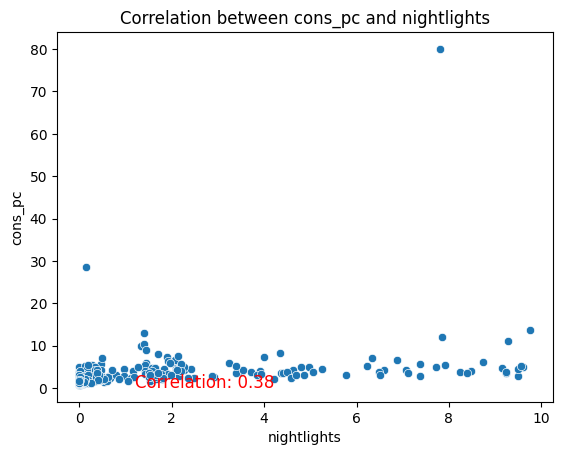

In [39]:
# Create scatter plot
sns.scatterplot(data=df_clusters, x='nightlights', y='cons_pc')

# Add title and labels
plt.title('Correlation between cons_pc and nightlights', fontsize=12)
plt.xlabel('nightlights')
plt.ylabel('cons_pc')

# Show the correlation value on the plot
plt.text(1.2, 0.02, f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Show the plot
plt.show()

##  Calculate the correlation matrix

In [40]:
df_cons_night = df_clusters[['cons_pc', 'nightlights']]
df_cons_night

,cons_pc,nightlights
0,1.423239,0.025206
1,1.266204,0.000000
2,1.566870,0.000000
3,1.669245,0.008266
4,1.089891,0.002295
...,...,...
775,1.409932,0.000000
776,1.242801,0.000000
777,1.804122,0.003557
778,1.791725,0.000000


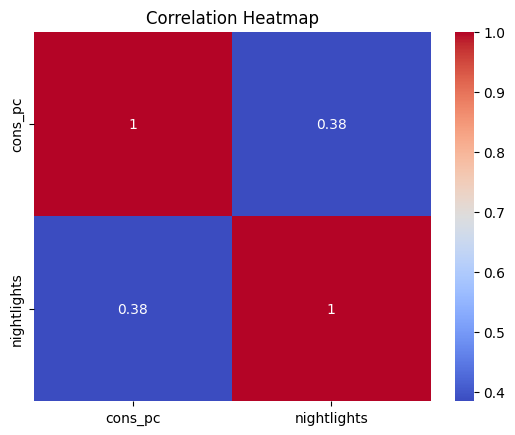

In [41]:
# Calculate the correlation matrix
correlation_matrix = df_cons_night.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

## Create a violin plot

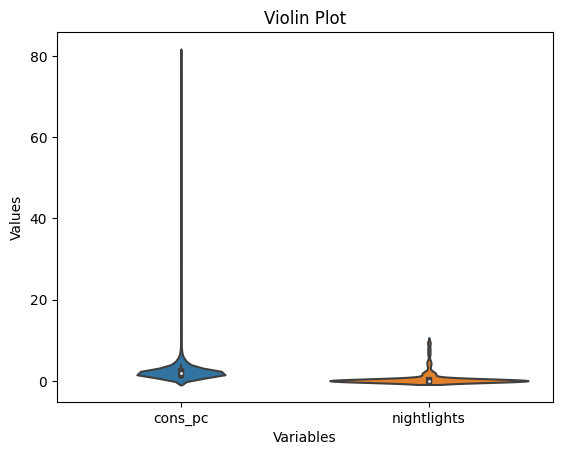

In [42]:
# Create a violin plot
sns.violinplot(data=df_cons_night)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Violin Plot')

# Show the plot
plt.show()

## Export the clusters with nightlight dataset

In [43]:
df_clusters.to_csv(os.path.join(PROCESSED_DIR, 'df_clusters_malawi_nl.csv'), index=False)